In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
mpl.rc('font', family = 'Arial')

In [30]:
# read in results
path = "C:\\Users\\ytsma22c\\Google Drive\\Misc Work\\LOD paper\\final_results.csv"
data = pd.read_csv(path)

## Make dataset for figure comparison here

In [4]:
def subsect(instrument, atmosphere):
    if instrument == "both":
        pass
    else: 
        data.drop(data[data.instrument != instrument].index, inplace = True)
    
    if atmosphere == "all":
        pass
    else:
        data.drop(data[data.atmosphere != atmosphere].index, inplace = True)

In [31]:
instrument = input("Instrument (LANL/ChemLIBS/both): ")
atmosphere = input("Atmosphere (Mars/Earth/Vacuum/all): ")
subsect(instrument, atmosphere)
display(data)

Instrument (LANL/ChemLIBS/both): ChemLIBS
Atmosphere (Mars/Earth/Vacuum/all): Vacuum


,element,instrument,atmosphere,LOB_Braga,LOB_metals,LOD_Braga,LOD_metals,LOQ_Braga,LOQ_metals,Avg_Braga,Avg_metals,RMSEP_Braga,RMSEP_metals,R2_Braga,R2_metals
2,Li,ChemLIBS,Vacuum,2.874633,1.596866,5.749266,3.193731,17.422018,9.677973,32.788682,27.947815,27.541885,25.034522,0.261229,0.328527
6,MnO,ChemLIBS,Vacuum,0.384405,0.213538,0.768811,0.427076,2.329730,1.294170,4.892923,4.307594,1.922483,1.741411,0.846564,0.812182
10,Na2O,ChemLIBS,Vacuum,0.173361,0.096303,0.346722,0.192605,1.050674,0.583652,2.898759,2.772339,0.876584,0.913898,0.553498,0.605177
14,Ni,ChemLIBS,Vacuum,18.296898,10.163971,36.593796,20.327942,110.890291,61.599824,180.261180,124.925418,127.862501,102.608021,0.182089,0.333261
18,Pb,ChemLIBS,Vacuum,2.232194,1.239989,4.464387,2.479978,13.528446,7.515085,22.972971,19.561266,25.102981,23.281305,0.093083,0.126805
22,Rb,ChemLIBS,Vacuum,12.816807,7.119767,25.633614,14.239534,77.677617,43.150104,147.382137,121.720204,66.092273,61.171599,0.254603,0.454017
26,SiO2,ChemLIBS,Vacuum,3.022218,1.678850,6.044437,3.357699,18.316475,10.174846,58.745918,58.706928,5.998554,6.001847,0.819482,0.820964
30,Sr,ChemLIBS,Vacuum,27.283735,15.156181,54.567471,30.312361,165.355972,91.855641,266.004888,234.623014,124.064830,123.283486,0.176910,0.281476
34,Zn,ChemLIBS,Vacuum,5.088031,2.826413,10.176061,5.652826,30.836548,17.129777,88.182470,75.133736,43.022760,42.537371,0.321645,0.359821


#### Split between majors and minors

In [32]:
maj_list = ['MnO', 'Na2O', 'SiO2']
majors = data[data.element.isin(maj_list)].reset_index(drop=True)
minors = data[~data.element.isin(maj_list)].reset_index(drop=True)
display(majors)
display(minors)

,element,instrument,atmosphere,LOB_Braga,LOB_metals,LOD_Braga,LOD_metals,LOQ_Braga,LOQ_metals,Avg_Braga,Avg_metals,RMSEP_Braga,RMSEP_metals,R2_Braga,R2_metals
0,MnO,ChemLIBS,Vacuum,0.384405,0.213538,0.768811,0.427076,2.329730,1.294170,4.892923,4.307594,1.922483,1.741411,0.846564,0.812182
1,Na2O,ChemLIBS,Vacuum,0.173361,0.096303,0.346722,0.192605,1.050674,0.583652,2.898759,2.772339,0.876584,0.913898,0.553498,0.605177
2,SiO2,ChemLIBS,Vacuum,3.022218,1.678850,6.044437,3.357699,18.316475,10.174846,58.745918,58.706928,5.998554,6.001847,0.819482,0.820964


,element,instrument,atmosphere,LOB_Braga,LOB_metals,LOD_Braga,LOD_metals,LOQ_Braga,LOQ_metals,Avg_Braga,Avg_metals,RMSEP_Braga,RMSEP_metals,R2_Braga,R2_metals
0,Li,ChemLIBS,Vacuum,2.874633,1.596866,5.749266,3.193731,17.422018,9.677973,32.788682,27.947815,27.541885,25.034522,0.261229,0.328527
1,Ni,ChemLIBS,Vacuum,18.296898,10.163971,36.593796,20.327942,110.890291,61.599824,180.261180,124.925418,127.862501,102.608021,0.182089,0.333261
2,Pb,ChemLIBS,Vacuum,2.232194,1.239989,4.464387,2.479978,13.528446,7.515085,22.972971,19.561266,25.102981,23.281305,0.093083,0.126805
3,Rb,ChemLIBS,Vacuum,12.816807,7.119767,25.633614,14.239534,77.677617,43.150104,147.382137,121.720204,66.092273,61.171599,0.254603,0.454017
4,Sr,ChemLIBS,Vacuum,27.283735,15.156181,54.567471,30.312361,165.355972,91.855641,266.004888,234.623014,124.064830,123.283486,0.176910,0.281476
5,Zn,ChemLIBS,Vacuum,5.088031,2.826413,10.176061,5.652826,30.836548,17.129777,88.182470,75.133736,43.022760,42.537371,0.321645,0.359821


## Compare between Braga and metal background methods

In [14]:
# make plotting function
def braga_metals(lotype):
    #define variables
    braga = lotype + '_Braga'
    metals = lotype + '_metals'
    params = instrument + "_" + atmosphere + "_" + lotype
    
    # define plot stuff
    width = 0.2
    c1 = 'navy'
    c2 = 'goldenrod'
    ysize = 12
    lsize = 14
    tsize = 16
    
    #labels
    majlab = majors.element
    minlab = minors.element
    # tick locations
    majt1 = [0, 0.5, 1] 
    majt2 = [x + width for x in majt1]
    mint1 = np.arange(0,3,step=0.5)
    mint2 = [x + width for x in mint1]
    majtk = [x + width/2 for x in majt1]
    mintk = [x + width/2 for x in mint1]

    # make figure
    fig, (maj, minor) = plt.subplots(ncols = 2, figsize = (10,5),
                                     # make LOD one smaller
                                     gridspec_kw={'width_ratios': [1,2]})
    # majors
    maj1 = maj.bar(majt1, majors[braga], width, label = "Braga", color = c1)
    maj2 = maj.bar(majt2, majors[metals], width, label = "metals", color = c2)
    # minors
    min1 = minor.bar(mint1, minors[braga], width, label = "Braga", color = c1)
    min2 = minor.bar(mint2, minors[metals], width, label = "metals", color = c2)
    
    # formatting
    if lotype == 'R2':
        maj.set_ylabel(lotype, fontsize = tsize)
        plt.subplots_adjust(wspace = 0, hspace =0)
        minor.yaxis.set_ticklabels([])
    else: 
        maj.set_ylabel((lotype + " (wt%)"), fontsize = tsize)
        minor.set_ylabel((lotype + " (ppm)"), fontsize = tsize)
        minor.tick_params(axis = 'y', which = 'major', labelsize = ysize)  
   
    maj.tick_params(axis = 'y', which = 'major', labelsize = ysize)
    maj.set_xticks(majtk)
    maj.set_xticklabels(majlab, fontsize = lsize)

    minor.set_xticks(mintk)
    minor.set_xticklabels(minlab, fontsize = lsize)
    minor.legend(handles = [maj1, maj2], fontsize = lsize)
    
    # save image
    path = "C:\\Users\\ytsma22c\\Google Drive\\Misc Work\\LOD paper\\figures\\" + params + '_Braga_metals.eps'
    path1 = "C:\\Users\\ytsma22c\\Google Drive\\Misc Work\\LOD paper\\figures\\" + params + '_Braga_metals.jpeg'
    plt.savefig(path, bbox_inches="tight") # save as .eps
    plt.savefig(path1, bbox_inches="tight") # save as .jpeg
    plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


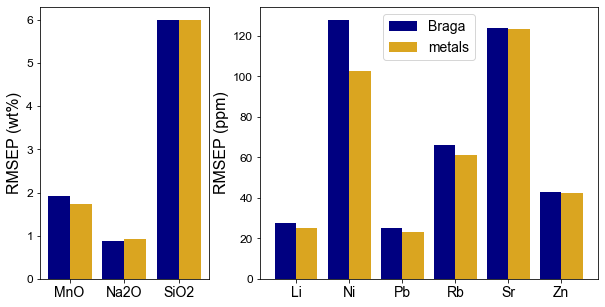

In [33]:
braga_metals("RMSEP")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


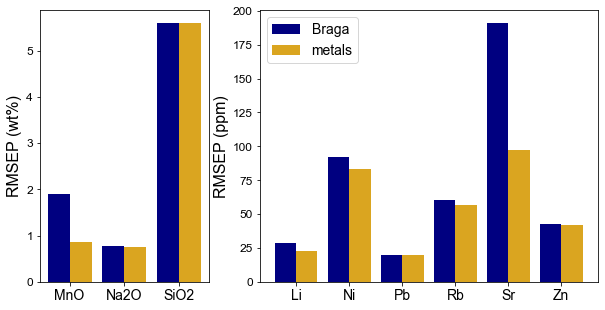

In [22]:
braga_metals("RMSEP")